In [1]:
import numpy as np
import librosa

# Define the Haar Wavelet Transform function

def haar_wavelet(f,depth):
    
    if len(f) % 2 == 1:
        f = f[:-1]
    
    g = np.zeros_like(f)
    n2 = len(f)>>1
    
    first_half = f[::2]
    second_half = f[1::2]
    
    approx_coeff = []
    detail_coeff = []
    
    for i in range(len(first_half)):
        approx_index_result = first_half[i] + second_half[i]
        approx_coeff.append(approx_index_result)
        
        detail_index_result = second_half[i] - first_half[i]
        detail_coeff.append(detail_index_result)
        
    g[:n2] = approx_coeff
    
    g[n2:] = detail_coeff
    
    if depth >= 2:
        g[:n2] = haar_wavelet(g[:n2],depth-1)
    return g

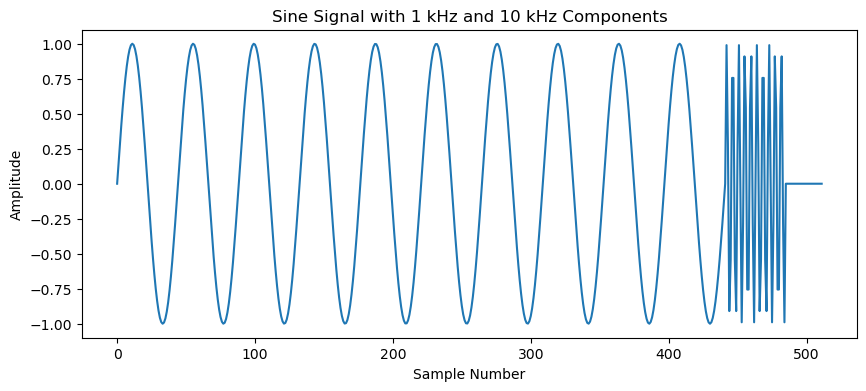

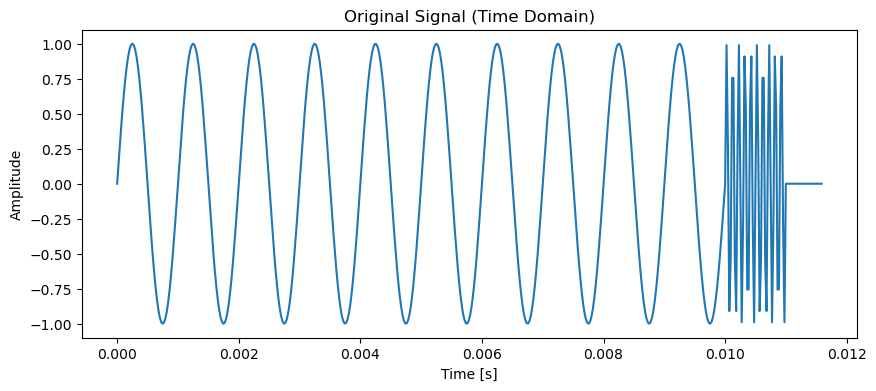

In [12]:
import matplotlib.pyplot as plt
import math

# Generate a sample 1D audio signal composed of 1kHz and 10kHz components

# Parameters
fs = 44100  # Sampling frequency
f1 = 1000   # Frequency 1 (1 kHz)
f2 = 10000  # Frequency 2 (10 kHz)

# Number of samples for 10 full waves
n1 = int(fs * 10 / f1)  # For 1 kHz
n2 = int(fs * 10 / f2)  # For 10 kHz

# Total number of samples (next power of 2)
total_samples = n1 + n2
next_power_of_2 = int(pow(2, math.ceil(math.log(total_samples, 2))))

# Time vectors
t1 = np.linspace(0, 10/f1, n1, endpoint=False)
t2 = np.linspace(0, 10/f2, n2, endpoint=False)

# Sine waves
sine_wave_1 = np.sin(2 * np.pi * f1 * t1)
sine_wave_2 = np.sin(2 * np.pi * f2 * t2)

# Combine the signals and pad with zeros if necessary
signal = np.concatenate((sine_wave_1, sine_wave_2))
signal = np.pad(signal, (0, next_power_of_2 - len(signal)), 'constant')

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title('Sine Signal with 1 kHz and 10 kHz Components')
plt.show()

# Plot the signal in the Time Domain
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(signal)) / fs, signal)
plt.title("Original Signal (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

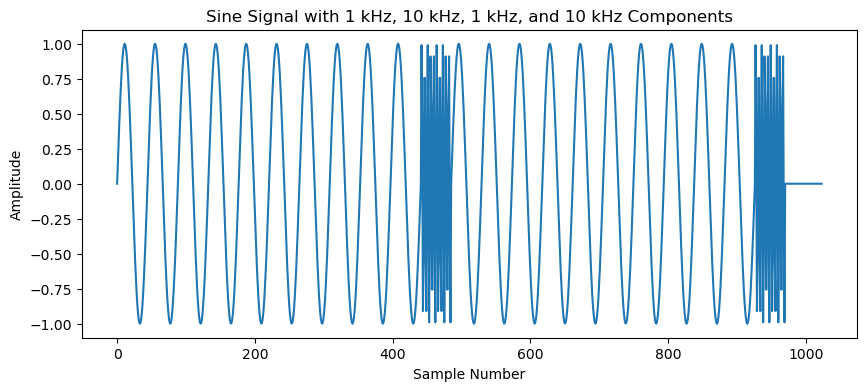

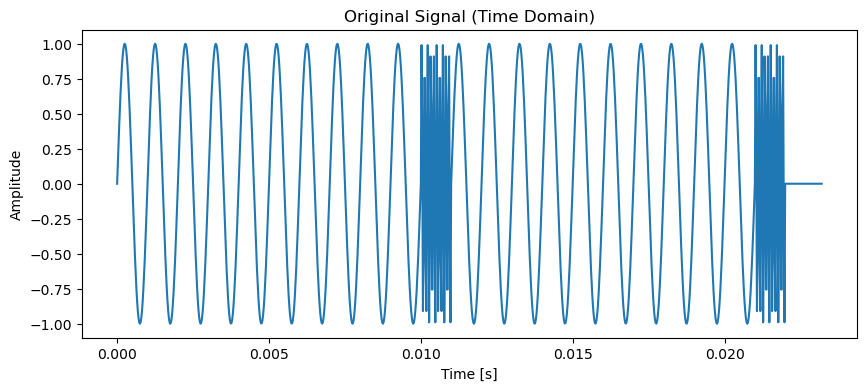

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters
fs = 44100  # Sampling frequency
frequencies = [1000, 10000, 1000, 10000]  # Frequencies in Hz

# Generate the time vectors and sine waves for each frequency
signals = []
for f in frequencies:
    n = int(fs * 10 / f)  # Number of samples for 10 full waves
    t = np.linspace(0, 10/f, n, endpoint=False)
    sine_wave = np.sin(2 * np.pi * f * t)
    signals.append(sine_wave)

# Combine the signals
signal = np.concatenate(signals)

# Calculate the next power of 2 for zero padding
next_power_of_2 = int(pow(2, math.ceil(math.log(len(signal), 2))))
signal = np.pad(signal, (0, next_power_of_2 - len(signal)), 'constant')

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title('Sine Signal with 1 kHz, 10 kHz, 1 kHz, and 10 kHz Components')
plt.show()

# Plot the signal in the Time Domain
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(signal)) / fs, signal)
plt.title("Original Signal (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [13]:
# Define the DFT plotter function 

def plot_dft(signal, sample_rate):
    # Perform the Discrete Fourier Transform (DFT)
    dft = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(signal), d=1/sample_rate)
    
    # Plot the original signal
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(signal)) / sample_rate, signal)
    plt.title("Original Signal (Time Domain)")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")

    # Plot the magnitude of the DFT (Frequency Spectrum)
    plt.subplot(2, 1, 2)
    plt.stem(frequencies[:len(signal) // 2], np.abs(dft)[:len(signal) // 2], 'b', markerfmt=" ", basefmt="-b")
    plt.title("Magnitude of DFT (Frequency Domain)")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")

    # Show the plots
    plt.tight_layout()
    plt.show()

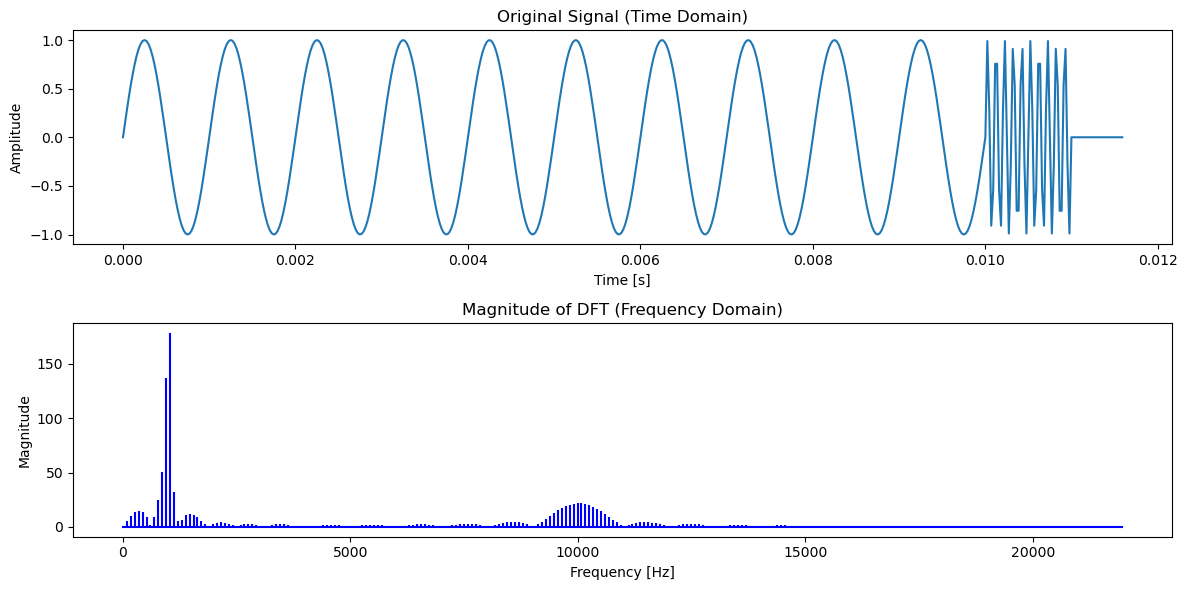

In [14]:
# Plot the DFT output of the input signal

plot_dft(signal, 44100)

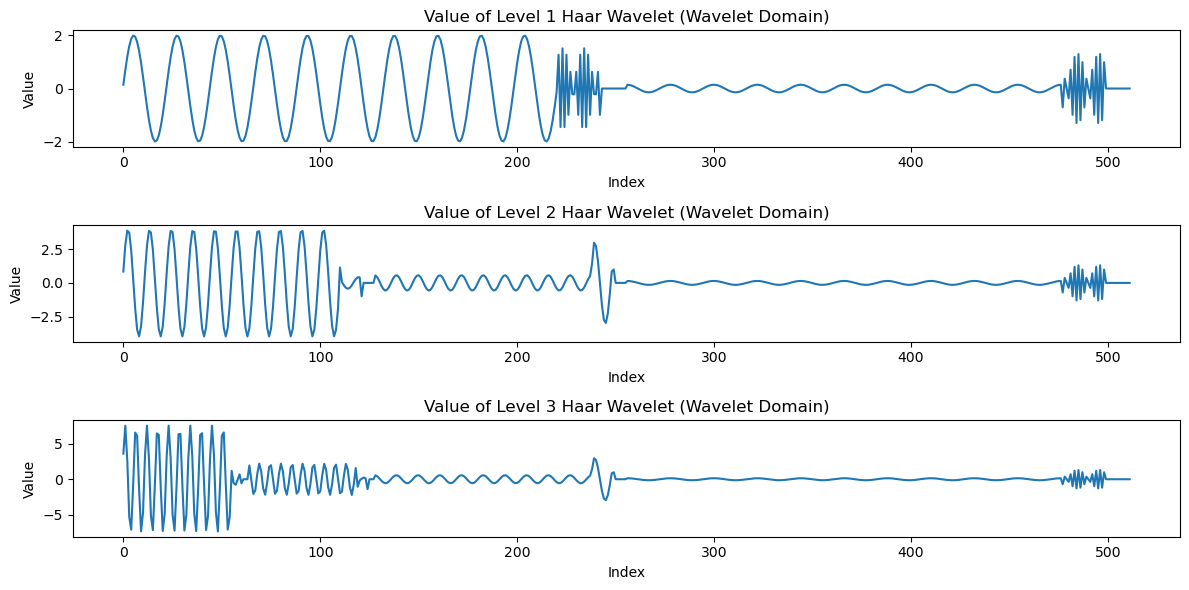

In [15]:
level_1_result = haar_wavelet(signal , 1)
level_2_result = haar_wavelet(signal , 2)
level_3_result = haar_wavelet(signal , 3)

# Plot 1-Level Haar Transform
plt.figure(figsize=(12, 6))

# Plot 3-Level Haar Transform
plt.subplot(3, 1, 1)
plt.plot(level_1_result)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Value of Level 1 Haar Wavelet (Wavelet Domain)')

# Plot 2-Level Haar Transform
plt.subplot(3, 1, 2)
plt.plot(level_2_result)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Value of Level 2 Haar Wavelet (Wavelet Domain)')

# Plot 3-Level Haar Transform
plt.subplot(3, 1, 3)
plt.plot(level_3_result)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Value of Level 3 Haar Wavelet (Wavelet Domain)')


# Show the plots
plt.tight_layout()
plt.show()

In [16]:
# Define DFT function 

def just_dft(signal, sample_rate):
    # Perform the Discrete Fourier Transform (DFT)
    dft = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(signal), d=1/sample_rate)
    return dft, frequencies

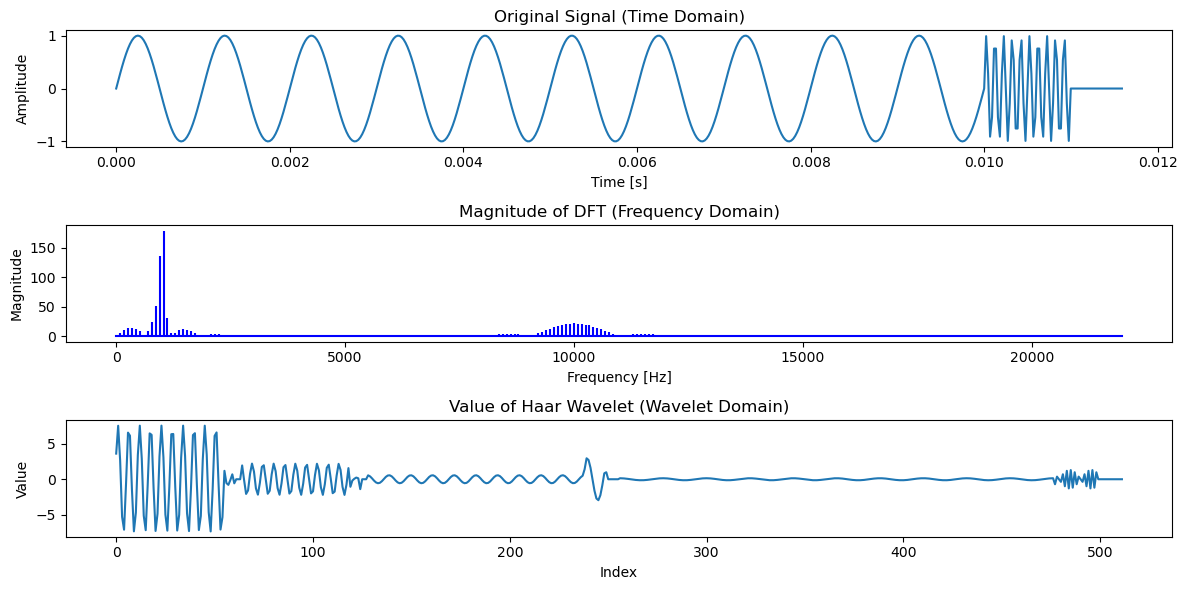

In [17]:
sample_rate = 44100

result = haar_wavelet(signal , 3)
dft, frequencies = just_dft(signal, sample_rate)

# Plot the original signal
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(np.arange(len(signal)) / sample_rate, signal)
plt.title("Original Signal (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Plot the magnitude of the DFT (Frequency Spectrum)
plt.subplot(3, 1, 2)
plt.stem(frequencies[:len(signal) // 2], np.abs(dft)[:len(signal) // 2], 'b', markerfmt=" ", basefmt="-b")
plt.title("Magnitude of DFT (Frequency Domain)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")

# Plot the value of the Haar Wavelet (Wavelet Spectrum)
# Plotting the data
plt.subplot(3, 1, 3)
plt.plot(result)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Value of Haar Wavelet (Wavelet Domain)')


# Show the plots
plt.tight_layout()
plt.show()


In [18]:
# Define the Inverse Haar Wavelet Transform function for 1D Signals
def inverse_haar_wavelet(f,depth):
    if depth == 0:
        return f
    else:
        n2 = len(f)>>1
        h = inverse_haar_wavelet(f[:n2],depth-1)
        g = np.zeros_like(f)
        g[1::2] = (h + f[n2:])/2
        g[::2] = (h - f[n2:])/2
        return g

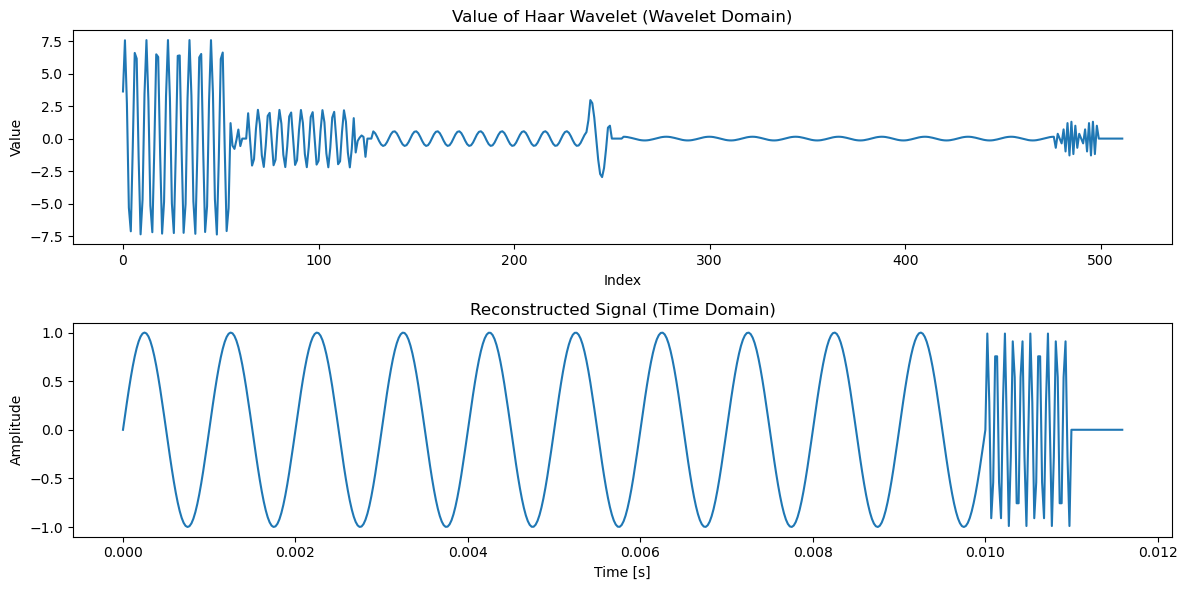

In [19]:
reconstructed_signal = inverse_haar_wavelet(result, 3)

# Plot the reconstructed signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(reconstructed_signal)) / sample_rate, reconstructed_signal)
plt.title("Reconstructed Signal (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Plot the value of the Haar Wavelet (Wavelet Spectrum)
# Plotting the data
plt.subplot(2, 1, 1)
plt.plot(result)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Value of Haar Wavelet (Wavelet Domain)')


# Show the plots
plt.tight_layout()
plt.show()